In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

In [3]:
df  = pd.read_csv("/content/drive/My Drive/DataAnalysisWithPython/Libraries/DataCleaningProcess/DataCleaningProcess01/LoanStatus.csv")

#Data Analysis And Manipulation:

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


**Removing the unused or irrelevant columns:**

In [6]:
# Dropping unused columns.
to_drop = ['Education']
df.drop(to_drop, inplace = True, axis = 1)
df.head(5)

,Loan_ID,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
df.shape

(614, 12)

In [9]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [11]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


**Check the duplicate values:**

In [12]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 614, dtype: bool

In [13]:
df.duplicated().sum()

0

In [14]:
# df['Income'] = df[['ApplicantIncome' , 'CoapplicantIncome']].apply(lambda x: '{}+{}'.format(x[0], x[1]), axis=1) used for date or time
# df['Income'].head()

###Insert anew column before the specific columns:

In [15]:
# Assuming your DataFrame is named df
new_col_data = df['ApplicantIncome']+df['CoapplicantIncome'] # Example data for the new column
new_col_name = 'Income' # Name of the new column
insert_before_col = 'Loan_Status'  # Name of the column before which you want to insert


In [16]:
# Create the new column
new_series = pd.Series(new_col_data, name=new_col_name)

In [17]:
# Find the index of the column before which you want to insert
insert_index = df.columns.get_loc(insert_before_col)

In [18]:
# Insert the new column before the specified column
df.insert(insert_index, new_col_name, new_series)

In [19]:
df.head()

,Loan_ID,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income,Loan_Status
0,LP001002,Male,No,0,No,5849,0.0,NaN,360.0,1.0,Urban,5849.0,Y
1,LP001003,Male,Yes,1,No,4583,1508.0,128.0,360.0,1.0,Rural,6091.0,N
2,LP001005,Male,Yes,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,3000.0,Y
3,LP001006,Male,Yes,0,No,2583,2358.0,120.0,360.0,1.0,Urban,4941.0,Y
4,LP001008,Male,No,0,No,6000,0.0,141.0,360.0,1.0,Urban,6000.0,Y


**Replacing the value of the rows if necessary:**

In [20]:
# # Replacing the values in the row
# replace_val = {'Male':0, 'Female':1}
# replace_valu = {'No': 0, 'Yes': 1}
# replace_value = {'No': 0, 'Yes': 1}
# df = df.replace({"Gender": replace_val})
# df = df.replace({"Married": replace_valu})
# df = df.replace({"Self_Employed": replace_value})

# df.head()

**Check for missing or null values in the DataFrame:**

In [21]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Income                0
Loan_Status           0
dtype: int64

In [22]:
dataframe = df.dropna()
dataframe.head()

,Loan_ID,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income,Loan_Status
1,LP001003,Male,Yes,1,No,4583,1508.0,128.0,360.0,1.0,Rural,6091.0,N
2,LP001005,Male,Yes,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,3000.0,Y
3,LP001006,Male,Yes,0,No,2583,2358.0,120.0,360.0,1.0,Urban,4941.0,Y
4,LP001008,Male,No,0,No,6000,0.0,141.0,360.0,1.0,Urban,6000.0,Y
5,LP001011,Male,Yes,2,Yes,5417,4196.0,267.0,360.0,1.0,Urban,9613.0,Y


In [23]:
dataframe.shape

(480, 13)

In [24]:
dataframe.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Income               0
Loan_Status          0
dtype: int64

In [25]:
dataframe.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Income
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167,6945.324833
std,5668.251251,2617.692267,80.508164,65.212401,0.353307,5969.948374
min,150.000000,0.000000,9.000000,36.000000,0.000000,1442.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000,4148.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000,5422.500000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000,7672.500000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000,81000.000000


**Calculate the number of different values in each column**

In [26]:
unique_counts = dataframe.nunique()
unique_counts

Loan_ID              480
Gender                 2
Married                2
Dependents             4
Self_Employed          2
ApplicantIncome      405
CoapplicantIncome    232
LoanAmount           186
Loan_Amount_Term       9
Credit_History         2
Property_Area          3
Income               437
Loan_Status            2
dtype: int64

**Calculate the number of different values in each column using value_counts():**

In [27]:
dataframe.column = ['Gender', 'Married', 'Dependents',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

<ipython-input-27-2c938d1eb9e2>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  dataframe.column = ['Gender', 'Married', 'Dependents',


In [28]:
for column in dataframe.column:
    value_counts = df[column].value_counts()
    print(f"Column '{column}' has {len(value_counts)} different values:\n{value_counts}\n")

Column 'Gender' has 2 different values:
Male      489
Female    112
Name: Gender, dtype: int64

Column 'Married' has 2 different values:
Yes    398
No     213
Name: Married, dtype: int64

Column 'Dependents' has 4 different values:
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Column 'Self_Employed' has 2 different values:
No     500
Yes     82
Name: Self_Employed, dtype: int64

Column 'ApplicantIncome' has 505 different values:
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64

Column 'CoapplicantIncome' has 287 different values:
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64

Column 'LoanAmount' has 203 different values:
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.

**Correlation:**

In [29]:
correlation_matrix= dataframe.corr()
correlation_matrix

<ipython-input-29-d5ca0003e774>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix= dataframe.corr()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Income
ApplicantIncome,1.000000,-0.112588,0.495310,-0.010838,-0.056152,0.900097
CoapplicantIncome,-0.112588,1.000000,0.190740,-0.005775,-0.008692,0.331580
LoanAmount,0.495310,0.190740,1.000000,0.050867,-0.040773,0.553914
Loan_Amount_Term,-0.010838,-0.005775,0.050867,1.000000,0.032937,-0.012822
Credit_History,-0.056152,-0.008692,-0.040773,0.032937,1.000000,-0.057126
Income,0.900097,0.331580,0.553914,-0.012822,-0.057126,1.000000


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

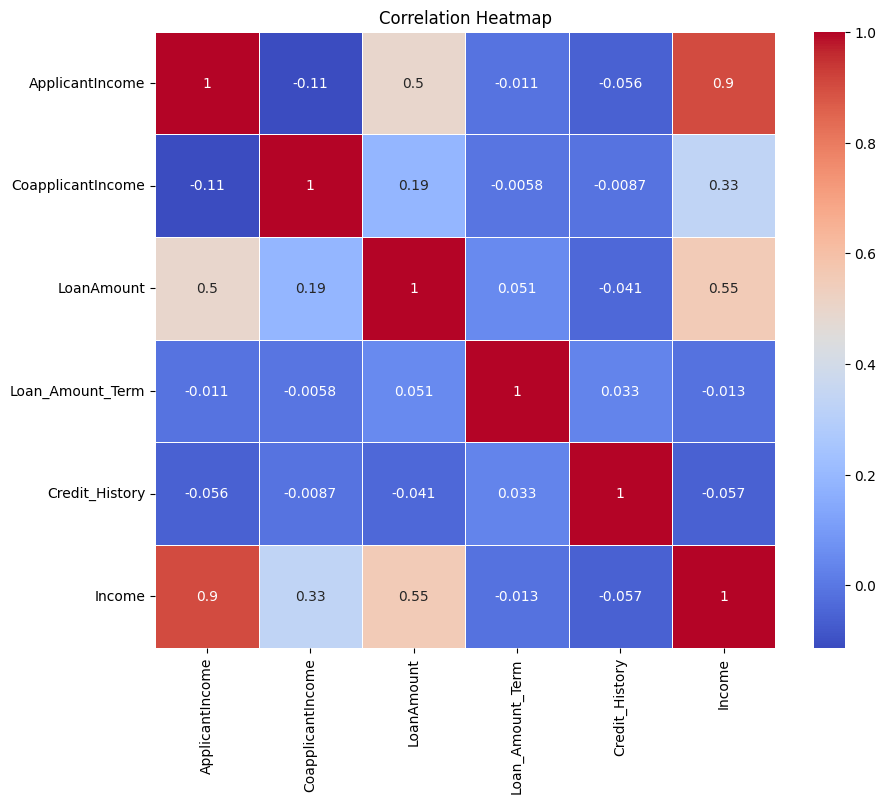

In [31]:
plt.figure(figsize=(10, 8))
#sns.heatmap: This function from Seaborn library is used to plot the heatmap.
#annot=True: This option displays the correlation coefficients on the heatmap.
#cmap='coolwarm':
#This option sets the color map for the heatmap, where positive correlations are displayed in warmer colors (red) and negative correlations in cooler colors (blue).
#linewidths=0.5: This option sets the width of the lines separating each cell in the heatmap.
sns.heatmap(correlation_matrix, annot= True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Correlation Graphs:**

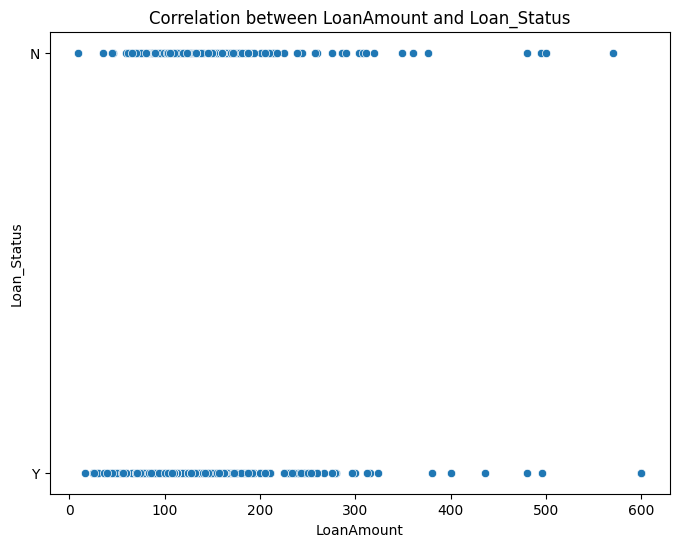

In [32]:
# Select the two columns for which you want to show the correlation
x_column = 'LoanAmount'  # Replace 'column1' with the name of the first column
y_column = 'Loan_Status'  # Replace 'column2' with the name of the second column

# Plot the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=dataframe[x_column], y=dataframe[y_column])
plt.title(f"Correlation between {x_column} and {y_column}")
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.show()

In [33]:
df['Income'].max()

81000.0

In [34]:
df['Income'].min()

1442.0

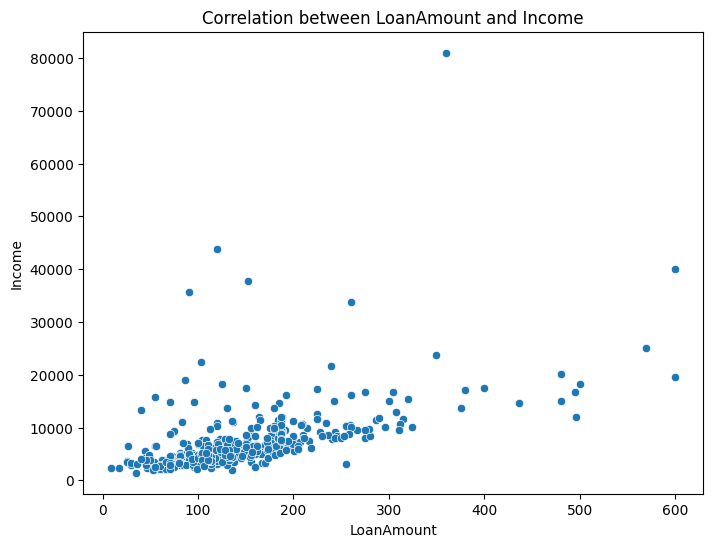

In [35]:
# Select the two columns for which you want to show the correlation
x_column = 'LoanAmount'  # Replace 'column1' with the name of the first column
y_column = 'Income'  # Replace 'column2' with the name of the second column

# Plot the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=dataframe[x_column], y=dataframe[y_column])
plt.title(f"Correlation between {x_column} and {y_column}")
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.show()

In [36]:
df.head()

,Loan_ID,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income,Loan_Status
0,LP001002,Male,No,0,No,5849,0.0,NaN,360.0,1.0,Urban,5849.0,Y
1,LP001003,Male,Yes,1,No,4583,1508.0,128.0,360.0,1.0,Rural,6091.0,N
2,LP001005,Male,Yes,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,3000.0,Y
3,LP001006,Male,Yes,0,No,2583,2358.0,120.0,360.0,1.0,Urban,4941.0,Y
4,LP001008,Male,No,0,No,6000,0.0,141.0,360.0,1.0,Urban,6000.0,Y


In [37]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()
# Loop through each column in the DataFrame
for column in df.columns:
    # Check if the column dtype is object (categorical)
    if df[column].dtype == 'object':
        # Fit and transform the column using label encoding
        df[column] = label_encoder.fit_transform(df[column])
# Now, the categorical values are replaced with numerical labels
df.head()


,Loan_ID,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income,Loan_Status
0,0,1,0,0,0,5849,0.0,NaN,360.0,1.0,2,5849.0,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,6091.0,0
2,2,1,1,0,1,3000,0.0,66.0,360.0,1.0,2,3000.0,1
3,3,1,1,0,0,2583,2358.0,120.0,360.0,1.0,2,4941.0,1
4,4,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,6000.0,1


In [38]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [39]:
x = df.iloc[:,-1].values.reshape(-1, 1)
y = df['Loan_Status']

In [40]:
from sklearn.model_selection import train_test_split
# The stratify parameter maintains the class distribution in both sets
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42, stratify=y)

In [41]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE oversampling to the training data
smote = SMOTE(random_state=42,sampling_strategy = 0.75)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lr = LinearRegression()
lr.fit(x_train_resampled, y_train_resampled)
y_pred= lr.predict(x_test)

In [49]:
df.head()

,Loan_ID,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income,Loan_Status
0,0,1,0,0,0,5849,0.0,NaN,360.0,1.0,2,5849.0,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,6091.0,0
2,2,1,1,0,1,3000,0.0,66.0,360.0,1.0,2,3000.0,1
3,3,1,1,0,0,2583,2358.0,120.0,360.0,1.0,2,4941.0,1
4,4,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,6000.0,1


In [51]:
from sklearn.metrics import mean_squared_error,confusion_matrix,classification_report
# Calculate the mean squared error
mse = mean_squared_error(y_test,y_pred)
mse

6.862556861297653e-32

In [46]:
# Print the coefficients and intercept of the model
print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)

Coefficients: [1.]
Intercept: 3.3306690738754696e-16
